In [2]:
import os
import numpy as np
import tifffile
from tqdm.notebook import  tqdm,trange
#from preprocessing import preprocessing_v2 as pp
DATA_PATH = r'C:\Users\amityu\Gel_Drop_Data'
movie = 'eye_gel'
MOVIE_PATH = os.path.join(DATA_PATH, movie)
import matplotlib.pyplot as plt

In [13]:
files = sorted(os.listdir(os.path.join(MOVIE_PATH, 'tif')))
gel_list = []
for file in tqdm(files):
    if file.endswith('.tif'):
        img = tifffile.imread(os.path.join(MOVIE_PATH, 'tif', file))
        img = np.pad(img, pad_width=max(img.shape)//2, mode='constant', constant_values=0)
        gel_list.append(img)

gel = np.array(gel_list)

  0%|          | 0/972 [00:00<?, ?it/s]

In [14]:
gel = np.expand_dims(gel, axis=1)
gel = gel.astype(np.float32)
gel.shape

(972, 1, 1024, 1024)

In [15]:
mask = (0,1,0,gel.shape[2], 0,gel.shape[3])
gel_transformed = pp.step_stabilize(gel.astype(np.float32), MOVIE_PATH, r'C:\Users\amityu\DataspellProjects\gel_sheets\add_data\eye_gel\transform\\', mask, mask)


2024-06-23 21:04:43


0it [00:00, ?it/s]

In [21]:
mask = (0,1,0,gel.shape[2], 0,gel.shape[3])
gel_transformed = pp.stabilize(gel.astype(np.float32), MOVIE_PATH, r'C:\Users\amityu\DataspellProjects\gel_sheets\add_data\eye_gel\transform\\', mask, mask, fixed_image_index=560)


2024-06-23 21:28:03


  0%|          | 0/972 [00:00<?, ?it/s]

In [22]:
gel_transformed = pp.apply_transform(gel,'C:/Users/amityu/DataspellProjects/gel_sheets/',movie)

  0%|          | 0/972 [00:00<?, ?it/s]

In [24]:
gel_transformed = np.squeeze(gel_transformed)
np.save(MOVIE_PATH + '/np/gel_transformed.npy', gel_transformed)

In [27]:
for t,img in enumerate(gel_transformed):
    tifffile.imwrite(MOVIE_PATH + '/tmp2/{}.tif'.format(t), img)

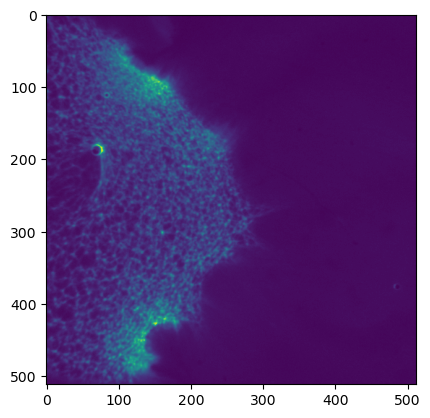

In [74]:
from tifffile import imread
image = imread(os.path.join(MOVIE_PATH, 'tif/20120913 exp3 x2_5 stream00972.tif'))
plt.imshow(image)
plt.show()

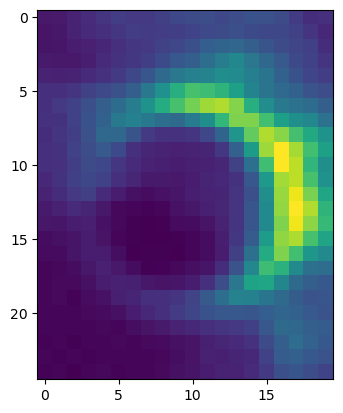

In [75]:
template = image[175:200, 60:80].copy()
plt.imshow(template)
plt.show()

In [76]:
from PIL import Image
tifffile.imwrite(os.path.join(DATA_PATH, 'tmp/image.tif'), image)
tifffile.imwrite(os.path.join(DATA_PATH, 'tmp/template.tif'), template)
pil_image = Image.fromarray(image)
pil_image.save(os.path.join(DATA_PATH, 'tmp/image.png'))
pil_template = Image.fromarray(template)
pil_template.save(os.path.join(DATA_PATH, 'tmp/template.png'))

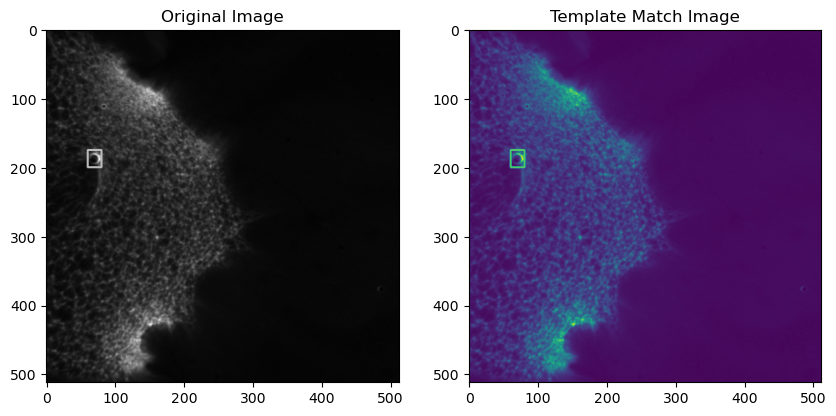

In [80]:
import cv2
# Load the template image
template_path = os.path.join(DATA_PATH, 'tmp/template.png')  # Provide the path to your template image
template = cv2.imread(template_path,cv2.IMREAD_ANYDEPTH)# cv2.IMREAD_GRAYSCALE)


# Convert to float32
template_float32 = np.float32(template)/65535
# Perform template matching
_image = (image/2**16).astype(np.float32)
result = cv2.matchTemplate(_image, template_float32, cv2.TM_CCOEFF_NORMED)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the matched region
h, w = template_float32.shape
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
#match_image = cv2.cvtColor(_image, cv2.COLOR_GRAY2BGR) 
match_image = _image

cv2.rectangle(match_image, top_left, bottom_right, 0.02, 2)

# Display the original and matched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Template Match Image")
plt.imshow(match_image)
plt.show()


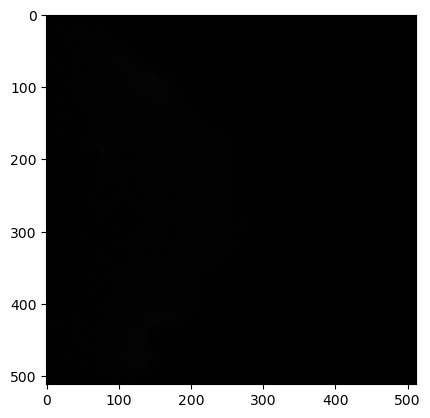

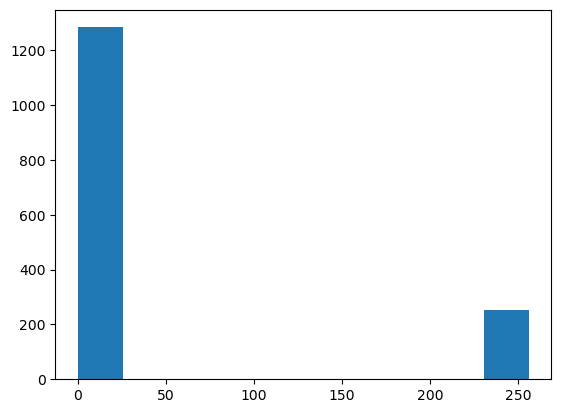

In [46]:
plt.hist(match_image[2].flatten())
plt.show()

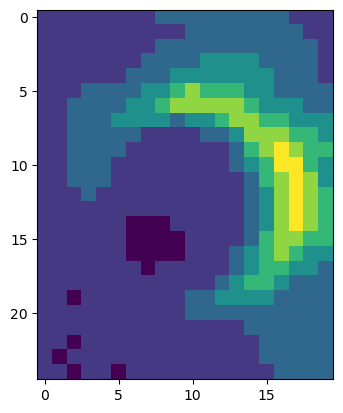

In [17]:
plt.imshow(template)

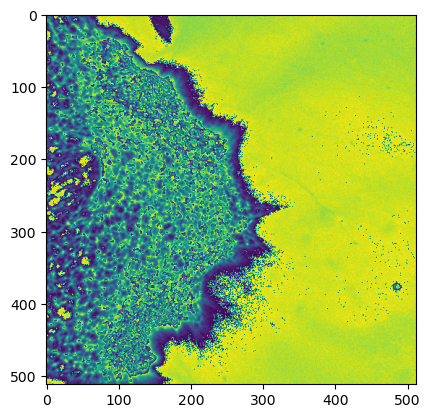

In [18]:
plt.imshow(image8)